In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import models as models
import activations as activations
import optimizers as optimizers
import losses as losses
import metrics as metrics
import layers as layers
import regularizers as regularizers
from keras.datasets import cifar10
import time

Using TensorFlow backend.


In [2]:
#ok funciona bien
#funcion que hace reshape de las imagenes
#sin agregar el bias
def reshapeImages(x,y):
    im_shape = x.shape[1:]
    x = np.reshape(x,(x.shape[0],np.prod(im_shape)))
    return x,y

In [37]:
#IMPORTO LAS IMAGENES DE CIFAR, LES HAGO EL RESHAPE DE LOS X_TRAIN Y X_TEST
(x_train,y_train),(x_test,y_test) = cifar10.load_data() #x = images #y = categories #loading data
x_train,y_train = reshapeImages(x_train,y_train)
x_test,y_test = reshapeImages(x_test,y_test)
#PREPROCESADO DE LOS DATOS
x_train = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
x_test = (x_test - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
y_train = y_train.flatten()
y_test = y_test.flatten()
n_clases = 10
yy_train = np.zeros([x_train.shape[0],n_clases])
yy_test = np.zeros([x_test.shape[0],n_clases])
yy_train[np.arange(x_train.shape[0]),y_train] = 1
yy_test[np.arange(x_test.shape[0]),y_test] = 1
#CREO EL MODELO Y VEO COMO PREDICE
layer_1 = layers.Dense(100,activations.Sigmoid(),1e-3,x_train.shape[1]) #capa 1
layer_2 = layers.Dense(100,activations.Sigmoid(),1e-3) #capa 2
layer_3 = layers.Dense(10,activations.Linear(),1e-3) #capa 3, ultima capa
model = models.Network()
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
epocas = 100 #cantidad de epocas a realizar
lr = 5e-4 #learning rate
rg = 1e-7
bs = 50 #batch size
start = time.time()
loss_tr,loss_ts,acc_tr,acc_ts = model.fit(x_train,yy_train,x_test,yy_test,lr,epocas,bs,metrics.accuracy,losses.MSE,optimizers.SGD,regularizers.L2,rg)
end = time.time()
print(end-start)

epoch: 0
training data:  0.9305883020014718 0.1
testing data:  0.9269127435663983 0.1
epoch: 1
training data:  0.9103242178728104 0.1
testing data:  0.9164920398081746 0.1
epoch: 2
training data:  0.874217131628959 0.17722
testing data:  1.0343054198353032 0.116
epoch: 3
training data:  0.867140922711399 0.18504
testing data:  1.0554222137353129 0.1423
epoch: 4
training data:  0.8648385732160352 0.17908
testing data:  1.0661030480885556 0.1398
epoch: 5
training data:  0.8685921035861289 0.18194
testing data:  1.0783442669404837 0.1362
epoch: 6
training data:  0.8657239081797287 0.1738
testing data:  1.0747130715198738 0.141
epoch: 7
training data:  0.8681071909473639 0.1711
testing data:  1.0742077860494068 0.1393
epoch: 8
training data:  0.8646676280458446 0.16896
testing data:  1.0534220831140815 0.14
epoch: 9
training data:  0.86665763760927 0.18158
testing data:  1.0117707404689853 0.1478
epoch: 10
training data:  0.8653946219267333 0.17986
testing data:  0.9736513514711544 0.1447


C:\Users\denis\Documents\ApAutomaticoP1\Pract2\activations.py:38: RuntimeWarning: overflow encountered in exp
  sig = (1+np.exp(-x))**(-1)


testing data:  0.9190631247070794 0.2086
epoch: 22
training data:  0.8237864598935721 0.27422
testing data:  0.9183576178703295 0.2103
epoch: 23
training data:  0.8223642027912513 0.28008
testing data:  0.9106340507063673 0.2227
epoch: 24
training data:  0.8183718731618511 0.2889
testing data:  0.8670830985544881 0.2487
epoch: 25
training data:  0.8178326660357046 0.29852
testing data:  0.8983646972931678 0.2357
epoch: 26
training data:  0.8120812208094453 0.31582
testing data:  0.9027256415790446 0.223
epoch: 27
training data:  0.8081413146186694 0.3305
testing data:  0.8771766546993462 0.2526
epoch: 28
training data:  0.8037296893273955 0.33194
testing data:  0.8911407205696124 0.219
epoch: 29
training data:  0.7935961070609195 0.36128
testing data:  0.8829728789874978 0.243
epoch: 30
training data:  0.7938755355568962 0.35856
testing data:  0.8793763207157814 0.2729
epoch: 31
training data:  0.7809614591982614 0.38192
testing data:  0.8841744539526502 0.2639
epoch: 32
training data:

Text(0, 0.5, 'Loss')

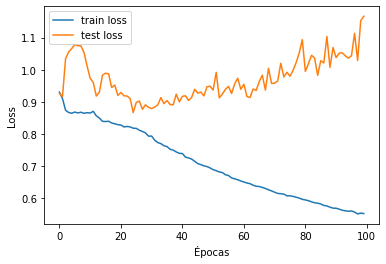

In [40]:
e = range(epocas)
plt.plot(e,loss_tr,label='train loss')
plt.plot(e,loss_ts,label='test loss')
plt.legend()
plt.xlabel("Épocas")
plt.ylabel("Loss")
#plt.savefig('ej8_lossacctr.pdf')

Text(0, 0.5, 'Accuracy')

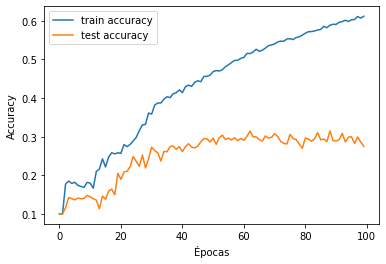

In [39]:
plt.plot(e,acc_tr,label='train accuracy')
plt.plot(e,acc_ts,label='test accuracy')
plt.legend()
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
#plt.savefig('ej8_lossaccts.pdf')

In [10]:
np.savetxt('ej8_accepochs.csv', (e,acc_ts), delimiter=',')

Text(0, 0.5, 'Accuracy')

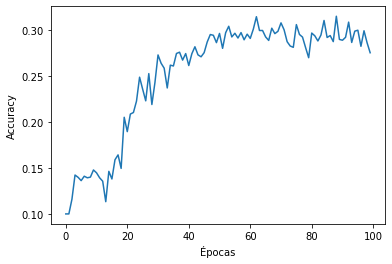

In [38]:
plt.plot(e,acc_ts)
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
#plt.savefig('ej8_lossepochtest.pdf')